<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/Ejercicio_de_%C3%A1rbol_de_regresi%C3%B3n_(pr%C3%A1ctica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
 drive.mount ("/content/drive")

Mounted at /content/drive


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [4]:
filename = "/content/drive/MyDrive/Data CodingDojo/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(filename)
df.head() 

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [8]:
X = df.drop(columns="PRICE")
y = df["PRICE"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

Importar modelo arbol

#1. Ejecutar modelo de arbol de regresion con los parametros por defecto

In [10]:
from sklearn.tree import DecisionTreeClassifier

Instancia modelo


In [11]:
dec_tree = DecisionTreeRegressor(random_state = 42)

Ajustar modelo a datos de entrenamiento

In [12]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Predecir valores objetivos para el conjunto de entrenamiento y prueba

In [13]:
 train_preds = dec_tree.predict(X_train)
 test_preds = dec_tree.predict(X_test)

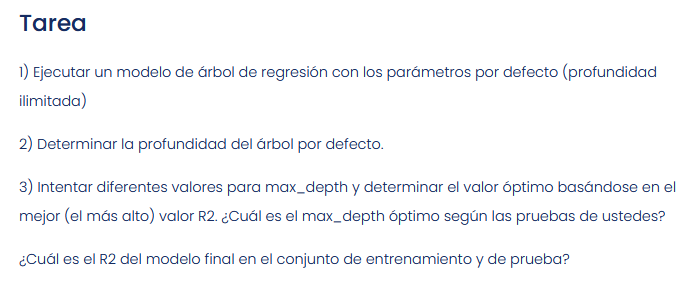

Evaluar modelo

In [15]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


#2. Determinar la profundidad del arbol por defecto

In [16]:
dec_tree.get_depth()

20

Nodos hojas

In [17]:
dec_tree.get_n_leaves()

360

#3. Intentar diferentes valores para max_depth y determinar el valor optimo basandose en el mejor R2

In [45]:
dec_tree_7 = DecisionTreeRegressor(max_depth=7, random_state = 42)
dec_tree_7.fit(X_train, y_train)
train_7_score = dec_tree_7.score(X_train, y_train)
test_7_score = dec_tree_7.score(X_test, y_test)
print(train_7_score)
print(test_7_score)

0.958516936961625
0.8463768203632204


In [28]:
max_depth_range = list(range(2,20))
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state =42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

In [46]:
r2

[0.6370379660938668,
 0.6928945219667566,
 0.7080984792681855,
 0.770697400084247,
 0.8259854674532312,
 0.8463768203632204,
 0.6383005344293057,
 0.6845876043422093,
 0.8460104271509634,
 0.8297363137769441,
 0.8271023856015939,
 0.814125554883834,
 0.8229955282755737,
 0.7338563810264247,
 0.5752097762818518,
 0.683430185486966,
 0.6716605024065316,
 0.7688469449948019]

Text(0, 0.5, 'r2')

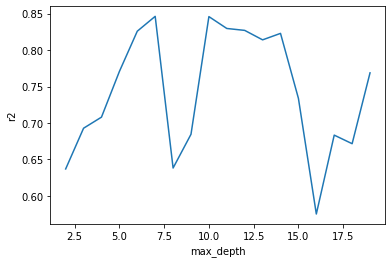

In [40]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel("max_depth")
plt.ylabel("r2")

Se puede apreciar 2 picos R2 donde el resultado es bueno en el conjunto de prueba. siendo este el valor 0,84 y puede darse con un max_depth de 7, y 10.
donde max_depth 7 es ligeramente mejor que 10